# Fonctions local

In [20]:
def recuperer_valeurs_dataset_en_local(chemin_echantillon_dataset):
    valeurs = []
    for nom_dossier_images_fruit in listdir(chemin_echantillon_dataset):
        chemin_dossier_images_fruit = chemin_echantillon_dataset + nom_dossier_images_fruit + "/"
        for nom_image_fruit in listdir(chemin_dossier_images_fruit):
            chemin_image_fruit = chemin_dossier_images_fruit + nom_image_fruit
            valeurs.append([chemin_image_fruit, nom_dossier_images_fruit])
    return valeurs

def creer_dataset_initial_en_local(chemin_echantillon_dataset):
    colonnes = ["chemin_image", "label"]
    valeurs = recuperer_valeurs_dataset_en_local(chemin_echantillon_dataset)
    return spark.createDataFrame(valeurs, colonnes)

def pretraiter(image):
    """
    Retourne l'image dont on a appliqué des prétraitements.
    
    
    Paramètre :
        - image : image à prétraiter
    """
    image_pretraitee = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image_pretraitee = cv.equalizeHist(image_pretraitee)
    image_pretraitee = cv.GaussianBlur(image_pretraitee, (5,5), 3)
    image_pretraitee = cv.resize(image_pretraitee, dsize=(100,100))
    return image_pretraitee

def extraire_descripteurs(nom_fichier_image):
    """
    Retourne les descripteurs associés aux features d'une image à partir du nom de son fichier
    
    
    Paramètre :
        - nom_fichier_image : nom du fichier contenant l'image dont on veut tirer les descripteurs
    """
    image = cv.imread(nom_fichier_image)
    image_pretraitee = pretraiter(image)
    sift = cv.SIFT_create()
    keypoints, descripteurs = sift.detectAndCompute(image_pretraitee, None)
    
    # Conversion des descripteurs en list pour que pyspark l'accepte
    descripteurs = descripteurs.tolist()
    
    return descripteurs

# Fonctions S3

In [1]:
import re

def creer_dataset_initial_depuis_s3(bucket):
    colonnes = ["chemin_image", "label"]
    valeurs = recuperer_valeurs_dataset_depuis_s3(bucket, True)
    return spark.createDataFrame(valeurs, colonnes)

def recuperer_valeurs_dataset_depuis_s3(bucket, utiliser_echantillon):
    valeurs = []
    
    if utiliser_echantillon:
        expression_image = "echantillon.*\.jpg"
    else:
        expression_image = "dataset.*\.jpg"
    
    for objet_bucket in bucket.objects.all():
        if re.search(expression_image, objet_bucket.key):
            #chemin_image = "s3://" + objet_bucket.bucket_name + "/" + objet_bucket.key
            chemin_image = objet_bucket.key
            categorie_image = recuperer_categorie_image_depuis_s3(objet_bucket.key)
            valeurs.append([chemin_image, categorie_image])
            
    return valeurs

def recuperer_categorie_image_depuis_s3(cle_objet_bucket):
    liste_dossiers_fichiers = cle_objet_bucket.split('/')
    categorie_fruit = liste_dossiers_fichiers[1]
    categorie_fruit = categorie_fruit.lower()
    categorie_fruit = categorie_fruit.replace(" ", "_")
    return categorie_fruit

In [37]:
valeurs = recuperer_valeurs_dataset_depuis_s3(bucket, True)
valeurs

[['s3://oc-p8-sb-data/echantillon/Apple Braeburn/0_100.jpg', 'apple_braeburn'],
 ['s3://oc-p8-sb-data/echantillon/Apple Braeburn/1_100.jpg', 'apple_braeburn'],
 ['s3://oc-p8-sb-data/echantillon/Apricot/0_100.jpg', 'apricot'],
 ['s3://oc-p8-sb-data/echantillon/Apricot/1_100.jpg', 'apricot'],
 ['s3://oc-p8-sb-data/echantillon/Banana/0_100.jpg', 'banana'],
 ['s3://oc-p8-sb-data/echantillon/Banana/1_100.jpg', 'banana']]

In [35]:
for objet_bucket in bucket.objects.all():
    print(objet_bucket.bucket_name)

oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-

oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-sb-data
oc-p8-

# Récupération des clés d'accès AWS

In [2]:
import pandas as pd

fichier_access_keys_AWS = "rootkey.csv"
df_access_keys_AWS = pd.read_csv(fichier_access_keys_AWS)
access_key_id = df_access_keys_AWS["AWSAccessKeyId"][0]
secret_access_key = df_access_keys_AWS["AWSSecretKey"][0]

# Connexion avec S3

In [3]:
import boto3

s3 = boto3.resource(
    service_name='s3',
    region_name='eu-west-3',
    aws_access_key_id=access_key_id,
    aws_secret_access_key=secret_access_key
)

bucket = s3.Bucket("oc-p8-sb-data")

# Chargement des images depuis S3

In [4]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, Row

# Initialisation du programme
#appName = "[OC/P8] - Déployer un modèle sur le cloud"
#master = "local"
#conf = SparkConf().setAppName(appName).setMaster(master)
#sc = SparkContext(conf=conf).getOrCreate()
sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()

df_images_fruits = creer_dataset_initial_depuis_s3(bucket)
df_images_fruits.show(truncate=True)

+--------------------+--------------+
|        chemin_image|         label|
+--------------------+--------------+
|echantillon/Apple...|apple_braeburn|
|echantillon/Apple...|apple_braeburn|
|echantillon/Apric...|       apricot|
|echantillon/Apric...|       apricot|
|echantillon/Banan...|        banana|
|echantillon/Banan...|        banana|
+--------------------+--------------+



In [22]:
help(sc.broadcast)

Help on method broadcast in module pyspark.context:

broadcast(value) method of pyspark.context.SparkContext instance
    Broadcast a read-only variable to the cluster, returning a :class:`Broadcast`
    object for reading it in distributed functions. The variable will
    be sent to each cluster only once.



In [5]:
import io
import boto3
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

def extraire_features_depuis_s3(chemin_image):
    
    # Récupération du bucket
    bucket_p8 = recuperer_bucket_s3()
    objet = bucket_p8.Object(chemin_image)
    file_binary_stream = io.BytesIO()
    objet.download_fileobj(file_binary_stream)
    
    # Chargement et prétraitement de l'image
    image = load_img(file_binary_stream, target_size=(224, 224))
    
    # Convertir en tableau numpy
    image = img_to_array(image) 
    
    # Créer la collection d'images (un seul échantillon)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    
    # Prétraiter l'image comme le veut VGG-16
    image = preprocess_input(image) 
    
    # Extraire les features de l'image
    cnn_extraction_features = creer_cnn_extraction_features()
    features = cnn_extraction_features.predict(image)[0]
    features = features.tolist()
    
    file_binary_stream.close()
    
    return features
    
def recuperer_bucket_s3():
    
    # Récupération des clés d'accès AWS
    access_key_id, secret_access_key = recuperer_cles_acces_aws()
    
    # Connexion à S3
    s3 = boto3.resource(
        service_name='s3',
        region_name='eu-west-3',
        aws_access_key_id=access_key_id,
        aws_secret_access_key=secret_access_key
    )
    
    return s3.Bucket("oc-p8-sb-data")

def recuperer_cles_acces_aws():
    fichier_access_keys_AWS = "rootkey.csv"
    df_access_keys_AWS = pd.read_csv(fichier_access_keys_AWS)
    access_key_id = df_access_keys_AWS["AWSAccessKeyId"][0]
    secret_access_key = df_access_keys_AWS["AWSSecretKey"][0]
    return access_key_id, secret_access_key

def creer_cnn_extraction_features():
    # Initialisation du modèle VGG-16 et suppression de ses 2 dernières couches (prédiction et fully-connected)
    cnn = VGG16()
    cnn = Model(inputs=cnn.inputs, outputs=cnn.layers[-2].output)
    return cnn

In [8]:
from pyspark.sql.types import StructType, ArrayType, FloatType
from pyspark.sql.functions import udf

udf_extraire_features = udf(extraire_features_depuis_s3, ArrayType(FloatType()))

df_images_fruits = df_images_fruits.withColumn("features", udf_extraire_features("chemin_image"))
df_images_fruits.show(truncate=True)

+--------------------+--------------+--------------------+
|        chemin_image|         label|            features|
+--------------------+--------------+--------------------+
|echantillon/Apple...|apple_braeburn|[0.0, 0.0, 0.0, 0...|
|echantillon/Apple...|apple_braeburn|[0.0, 0.0, 0.0, 0...|
|echantillon/Apric...|       apricot|[0.0, 0.0, 0.0, 0...|
|echantillon/Apric...|       apricot|[0.0, 0.0, 0.0, 0...|
|echantillon/Banan...|        banana|[0.0, 0.0, 0.0, 1...|
|echantillon/Banan...|        banana|[0.0, 0.0, 0.3409...|
+--------------------+--------------+--------------------+



### Extraction des features à la main pour éviter de faire planter le PC

In [6]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

def creer_cnn_extraction_features():
    # Initialisation du modèle VGG-16 et suppression de ses 2 dernières couches (prédiction et fully-connected)
    cnn = VGG16()
    cnn = Model(inputs=cnn.inputs, outputs=cnn.layers[-2].output)
    return cnn

cnn_extraction_features = creer_cnn_extraction_features()

In [8]:
import io
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

def extraire_features_depuis_s3(chemin_image):
    
    # Récupération du bucket
    objet = bucket.Object(chemin_image)
    file_binary_stream = io.BytesIO()
    objet.download_fileobj(file_binary_stream)
    
    # Chargement et prétraitement de l'image
    image = load_img(file_binary_stream, target_size=(224, 224))
    
    # Convertir en tableau numpy
    image = img_to_array(image) 
    
    # Créer la collection d'images (un seul échantillon)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    
    # Prétraiter l'image comme le veut VGG-16
    image = preprocess_input(image) 
    
    # Extraire les features de l'image
    features = cnn_extraction_features.predict(image)[0]
    features = features.tolist()
    
    file_binary_stream.close()
    
    return features

In [12]:
features_1 = extraire_features_depuis_s3('echantillon/Apple Braeburn/0_100.jpg')
features_2 = extraire_features_depuis_s3('echantillon/Apple Braeburn/1_100.jpg')
features_3 = extraire_features_depuis_s3('echantillon/Apricot/0_100.jpg')
features_4 = extraire_features_depuis_s3('echantillon/Apricot/1_100.jpg')
features_5 = extraire_features_depuis_s3('echantillon/Banana/0_100.jpg')
features_6 = extraire_features_depuis_s3('echantillon/Banana/1_100.jpg')

1/1 [==============================] - 2s 2s/step


In [17]:
from pyspark.sql import Row
rdd_features = sc.parallelize([Row(chemin_image="echantillon/Apple Braeburn/0_100.jpg", features=features_1), 
                               Row(chemin_image="echantillon/Apple Braeburn/1_100.jpg", features=features_2), 
                               Row(chemin_image="echantillon/Apricot/0_100.jpg", features=features_3), 
                               Row(chemin_image="echantillon/Apricot/1_100.jpg", features=features_4), 
                               Row(chemin_image="echantillon/Banana/0_100.jpg", features=features_5), 
                               Row(chemin_image="echantillon/Banana/1_100.jpg", features=features_6)])
df_features = spark.createDataFrame(rdd_features)
df_features.show(truncate=True)

+--------------------+--------------------+
|        chemin_image|            features|
+--------------------+--------------------+
|echantillon/Apple...|[0.0, 0.0, 0.0, 0...|
|echantillon/Apple...|[0.0, 0.0, 0.0, 0...|
|echantillon/Apric...|[0.0, 0.0, 0.0, 0...|
|echantillon/Apric...|[0.0, 0.0, 0.0, 0...|
|echantillon/Banan...|[0.0, 0.0, 0.0, 1...|
|echantillon/Banan...|[0.0, 0.0, 0.3409...|
+--------------------+--------------------+



In [20]:
df_images_fruits = df_images_fruits.join(df_features, "chemin_image").sort("chemin_image")
df_images_fruits.show(truncate=True)

+--------------------+--------------+--------------------+
|        chemin_image|         label|            features|
+--------------------+--------------+--------------------+
|echantillon/Apple...|apple_braeburn|[0.0, 0.0, 0.0, 0...|
|echantillon/Apple...|apple_braeburn|[0.0, 0.0, 0.0, 0...|
|echantillon/Apric...|       apricot|[0.0, 0.0, 0.0, 0...|
|echantillon/Apric...|       apricot|[0.0, 0.0, 0.0, 0...|
|echantillon/Banan...|        banana|[0.0, 0.0, 0.0, 1...|
|echantillon/Banan...|        banana|[0.0, 0.0, 0.3409...|
+--------------------+--------------+--------------------+



Dataframe à utiliser pour faire l'ACP.

### Test avec broadcast variables

In [5]:
import io
import boto3
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

def extraire_features_depuis_s3(chemin_image):
    
    # Récupération du bucket
    objet = broadcast_bucket.Object(chemin_image)
    file_binary_stream = io.BytesIO()
    objet.download_fileobj(file_binary_stream)
    
    # Chargement et prétraitement de l'image
    image = load_img(file_binary_stream, target_size=(224, 224))
    
    # Convertir en tableau numpy
    image = img_to_array(image) 
    
    # Créer la collection d'images (un seul échantillon)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    
    # Prétraiter l'image comme le veut VGG-16
    image = preprocess_input(image) 
    
    # Extraire les features de l'image
    features = broadcast_cnn_extraction_features.predict(image)[0]
    features = features.tolist()
    
    file_binary_stream.close()
    
    return features
    
def recuperer_bucket_s3():
    
    # Récupération des clés d'accès AWS
    access_key_id, secret_access_key = recuperer_cles_acces_aws()
    
    # Connexion à S3
    s3 = boto3.resource(
        service_name='s3',
        region_name='eu-west-3',
        aws_access_key_id=access_key_id,
        aws_secret_access_key=secret_access_key
    )
    
    return s3.Bucket("oc-p8-sb-data")

def recuperer_cles_acces_aws():
    fichier_access_keys_AWS = "rootkey.csv"
    df_access_keys_AWS = pd.read_csv(fichier_access_keys_AWS)
    access_key_id = df_access_keys_AWS["AWSAccessKeyId"][0]
    secret_access_key = df_access_keys_AWS["AWSSecretKey"][0]
    return access_key_id, secret_access_key

def creer_cnn_extraction_features():
    # Initialisation du modèle VGG-16 et suppression de ses 2 dernières couches (prédiction et fully-connected)
    cnn = VGG16()
    cnn = Model(inputs=cnn.inputs, outputs=cnn.layers[-2].output)
    return cnn

In [6]:
from pyspark.sql.types import StructType, ArrayType, FloatType
from pyspark.sql.functions import udf

broadcast_bucket = spark.sparkContext.broadcast(bucket)

cnn_extraction_features = creer_cnn_extraction_features()
broadcast_cnn_extraction_features = spark.sparkContext.broadcast(cnn_extraction_features)

udf_extraire_features = udf(extraire_features_depuis_s3, ArrayType(FloatType()))

df_images_fruits = df_images_fruits.withColumn("features", udf_extraire_features("chemin_image"))
df_images_fruits.show(truncate=True)

PicklingError: Can't pickle <class 'boto3.resources.factory.s3.Bucket'>: attribute lookup s3.Bucket on boto3.resources.factory failed

In [15]:
features = extraire_features_depuis_s3('echantillon/Apple Braeburn/1_100.jpg')

1/1 [==============================] - 2s 2s/step


In [16]:
features

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.690849781036377,
 0.0,
 0.0,
 0.0,
 0.013111412525177002,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.512442708015442,
 0.0,
 0.0,
 0.0,
 0.0,
 4.373032569885254,
 4.3484344482421875,
 2.331753730773926,
 0.9832409620285034,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.19014310836792,
 8.4771728515625,
 0.0,
 3.499730348587036,
 0.0,
 0.7366135120391846,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.3573381900787354,
 0.0,
 5.777450084686279,
 0.0,
 0.0,
 0.9726073741912842,
 0.0,
 3.265993595123291,
 0.0,
 0.0,
 0.26794594526290894,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.2166266441345215,
 0.0,
 0.0,
 0.0,
 0.14719229936599731,
 0.0,
 0.0,
 0.0,
 0.0,
 3.5981295108795166,
 0.0,
 0.0,
 3.132534980773926,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.410490036010742,
 1.7043554782867432,
 0.0,
 4.98112

In [17]:
len(features)

4096

In [5]:
objet = bucket.Object('echantillon/Apple Braeburn/0_100.jpg')

In [10]:
import io

file_binary_stream = io.BytesIO()

In [11]:
objet.download_fileobj(file_binary_stream)

In [13]:
from keras.utils import load_img
image = load_img(file_binary_stream, target_size=(224, 224))

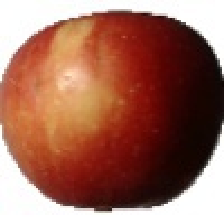

In [19]:
image

In [18]:
file_binary_stream.close()

# Extraction des features grâce au *Transfer Learning*

In [23]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

def creer_cnn_extraction_features():
    # Initialisation du modèle VGG-16 et suppression de ses 2 dernières couches (prédiction et fully-connected)
    cnn = VGG16()
    cnn = Model(inputs=cnn.inputs, outputs=cnn.layers[-2].output)
    return cnn

In [24]:
cnn_extraction_features = creer_cnn_extraction_features()

In [43]:
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from io import BytesIO

def charger_image_depuis_uri_s3(URI):
    

def extraire_features_image(cnn_extraction_features, lien_image):
    
    image = load_img(lien_image, target_size=(224, 224))
    
    # Convertir en tableau numpy
    image = img_to_array(image) 
    
    # Créer la collection d'images (un seul échantillon)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    
    # Prétraiter l'image comme le veut VGG-16
    image = preprocess_input(image) 
    
    # Extraire les features de l'image
    features = cnn_extraction_features.predict(image)[0]
    
    return features

In [44]:
chemin_test = "s3://oc-p8-sb-data/echantillon/Apple Braeburn/0_100.jpg"
extraire_features_image(cnn_extraction_features, chemin_test)

OSError: [Errno 22] Invalid argument: 's3://oc-p8-sb-data/echantillon/Apple Braeburn/0_100.jpg'

# Chargement des images et extraction des descripteurs

In [21]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, Row
from pyspark.sql.types import StructType, ArrayType, FloatType
from pyspark.sql.functions import udf
from os import listdir
import cv2 as cv

# Initialisation du programme
#appName = "[OC/P8] - Déployer un modèle sur le cloud"
#master = "local"
#conf = SparkConf().setAppName(appName).setMaster(master)
#sc = SparkContext(conf=conf).getOrCreate()
sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()
chemin_echantillon_dataset = "data/echantillon_dataset/"

df_images_fruits = creer_dataset_initial_en_local(chemin_echantillon_dataset)
#udf_extraire_descripteurs = udf(extraire_descripteurs, ArrayType(ArrayType(FloatType())))

#df_images_fruits = df_images_fruits.withColumn("descripteurs", udf_extraire_descripteurs("chemin_image"))
df_images_fruits.show(truncate=True)

+--------------------+------------------+
|        chemin_image|             label|
+--------------------+------------------+
|data/echantillon_...|apple_granny_smith|
|data/echantillon_...|apple_granny_smith|
|data/echantillon_...|           avocado|
|data/echantillon_...|           avocado|
|data/echantillon_...|            banana|
|data/echantillon_...|            banana|
+--------------------+------------------+



In [25]:
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

def extraire_features_image_en_local(cnn_extraction_features, chemin_image):
    
    #cnn_extraction_features = creer_cnn_extraction_features()
    
    image = load_img(chemin_image, target_size=(224, 224))
    
    # Convertir en tableau numpy
    image = img_to_array(image) 
    
    # Créer la collection d'images (un seul échantillon)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    
    # Prétraiter l'image comme le veut VGG-16
    image = preprocess_input(image) 
    
    # Extraire les features de l'image
    features = cnn_extraction_features.predict(image)[0]
    features = features.tolist()
    
    return features

In [54]:
chemin_image_test = "data/echantillon_dataset/apple_granny_smith/0_100.jpg"
features_image_test = extraire_features_image_en_local(cnn_extraction_features, chemin_image_test)

1/1 [==============================] - 2s 2s/step


In [56]:
len(features_image_test)

4096

In [27]:
udf_extraire_features = udf(lambda x, y : extraire_features_image_en_local(x, y), ArrayType(FloatType()))

df_images_fruits = df_images_fruits.withColumn("features", udf_extraire_features(cnn_extraction_features)("chemin_image"))
df_images_fruits.show(truncate=True)

TypeError: Invalid argument, not a string or column: <keras.engine.functional.Functional object at 0x000001CE695AD250> of type <class 'keras.engine.functional.Functional'>. For column literals, use 'lit', 'array', 'struct' or 'create_map' function.

Le plus simple et le plus sûr, c'est de n'avoir qu'un seul paramètre qui est la colonne concernée. Il faudra donc se connecter à chaque fois à S3 et de créer le cnn à chaque fois.

# Utilisation du Transfert Learning

Etant donné que l'on a près de 60K images et que dans le contexte du projet on est amenés à terme à traiter un large volume d'images, on peut alors utiliser la stratégie de *fine-tuning* total pour le projet qui consiste à entraîner tout le réseau à partir de nos images de fruits en modifiant la dernière couche *fully-connected*.

In [5]:
chemin_image_test = "data/echantillon_dataset/apple_granny_smith/0_100.jpg"

In [8]:
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

img = load_img(chemin_image_test, target_size=(224, 224))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

In [6]:
from keras.applications.vgg16 import VGG16

model = VGG16() # Création du modèle VGG-16 implementé par Keras

from keras.models import Model

# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [10]:
from keras.models import Model

# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
# get extracted features
features = model.predict(img)
print(features.shape)

1/1 [==============================] - 5s 5s/step
(1, 4096)


In [24]:
features[0][:25]

array([0.        , 0.        , 0.52266955, 3.375926  , 0.        ,
       0.        , 2.4915013 , 0.        , 0.        , 0.06624046,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.6396126 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

## Tests

In [7]:
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

img = load_img(chemin_image_test, target_size=(224, 224))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

In [8]:
y = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

1/1 [==============================] - 6s 6s/step


In [9]:
from keras.applications.vgg16 import decode_predictions

# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

Top 3 : [('n12267677', 'acorn', 0.7827795), ('n07742313', 'Granny_Smith', 0.15459922), ('n04409515', 'tennis_ball', 0.027031852)]


In [17]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [24]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras import Model

# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Récupérer la sortie de ce réseau
x = model.output

# Ajouter la nouvelle couche fully-connected pour la classification à 3 classes
#predictions = Dense(3, activation='softmax')(x)

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
predictions = Dense(3, activation='softmax')(class1)

# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)

In [20]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [22]:
for layer in new_model.layers:
    layer.trainable = True

# Création du bag-of-features

## Création des visual words

In [84]:
from pyspark.sql.functions import explode

df_tous_descripteurs = df_images_fruits.select(explode(df_images_fruits.descripteurs).alias("descripteurs"))
df_tous_descripteurs.count()

86

In [86]:
from pyspark.ml.linalg import Vectors, VectorUDT

udf_convertir_en_vecteur = udf(lambda x: Vectors.dense(x), VectorUDT())
df_tous_descripteurs = df_tous_descripteurs.withColumn('descripteurs_as_vector', 
                                                       udf_convertir_en_vecteur(df_tous_descripteurs.descripteurs))

In [87]:
df_tous_descripteurs.show()

+--------------------+----------------------+
|        descripteurs|descripteurs_as_vector|
+--------------------+----------------------+
|[1.0, 0.0, 0.0, 0...|  [1.0,0.0,0.0,0.0,...|
|[48.0, 67.0, 0.0,...|  [48.0,67.0,0.0,0....|
|[38.0, 53.0, 0.0,...|  [38.0,53.0,0.0,0....|
|[105.0, 114.0, 0....|  [105.0,114.0,0.0,...|
|[2.0, 1.0, 0.0, 0...|  [2.0,1.0,0.0,0.0,...|
|[1.0, 10.0, 1.0, ...|  [1.0,10.0,1.0,0.0...|
|[13.0, 2.0, 0.0, ...|  [13.0,2.0,0.0,2.0...|
|[8.0, 2.0, 0.0, 1...|  [8.0,2.0,0.0,1.0,...|
|[0.0, 4.0, 2.0, 0...|  [0.0,4.0,2.0,0.0,...|
|[3.0, 19.0, 35.0,...|  [3.0,19.0,35.0,14...|
|[42.0, 30.0, 0.0,...|  [42.0,30.0,0.0,0....|
|[2.0, 8.0, 0.0, 0...|  [2.0,8.0,0.0,0.0,...|
|[23.0, 7.0, 0.0, ...|  [23.0,7.0,0.0,0.0...|
|[7.0, 2.0, 0.0, 1...|  [7.0,2.0,0.0,1.0,...|
|[3.0, 19.0, 34.0,...|  [3.0,19.0,34.0,15...|
|[54.0, 26.0, 0.0,...|  [54.0,26.0,0.0,0....|
|[39.0, 31.0, 0.0,...|  [39.0,31.0,0.0,0....|
|[95.0, 11.0, 0.0,...|  [95.0,11.0,0.0,0....|
|[2.0, 1.0, 84.0, ...|  [2.0,1.0,8

In [88]:
df_tous_descripteurs.printSchema()

root
 |-- descripteurs: array (nullable = true)
 |    |-- element: float (containsNull = true)
 |-- descripteurs_as_vector: vector (nullable = true)



In [89]:
import math

# Définition du nombre de clusters
nb_total_descripteurs = df_tous_descripteurs.count()
nb_clusters = int(round(math.sqrt(nb_total_descripteurs), 0))

In [90]:
nb_clusters

9

In [91]:
from pyspark.ml.clustering import KMeans

# Clustering
kmeans = KMeans(featuresCol="descripteurs_as_vector", k=nb_clusters, seed=0)
kmeans.fit(df_tous_descripteurs)

KMeansModel: uid=KMeans_c2e2ad4e0c66, k=9, distanceMeasure=euclidean, numFeatures=128

In [ ]:
from pyspark.ml.feature import VectorAssembler

assemble=VectorAssembler(inputCols=['descripteurs'], outputCol='descripteurs_as_vector')
assembled_data=assemble.transform(data_customer)

In [ ]:
# transform our preprocess data to vector for PCA model via udf fonction to transform array into vector
to_vector = F.udf(lambda x: Vectors.dense(x), VectorUDT())

# creating vector column
df_images = df_images.withColumn('preprocess_data_vector', to_vector(df_images.preprocess_data))

In [76]:
from pyspark.sql import Row
eDF = spark.createDataFrame([Row(a=1, intlist=[1,2,3], mapfield={"a": "b"})])
eDF.show()
#eDF.select(explode(eDF.intlist).alias("anInt")).collect()

+---+---------+--------+
|  a|  intlist|mapfield|
+---+---------+--------+
|  1|[1, 2, 3]|{a -> b}|
+---+---------+--------+



In [81]:

eDF.select(explode(eDF.intlist).alias("anInt")).show()

+-----+
|anInt|
+-----+
|    1|
|    2|
|    3|
+-----+



In [69]:
image_fruit = df_images_fruits.first()

In [73]:
image_fruit.descripteurs

[[1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  24.0,
  106.0,
  3.0,
  165.0,
  64.0,
  0.0,
  0.0,
  0.0,
  16.0,
  39.0,
  17.0,
  165.0,
  144.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  34.0,
  26.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  11.0,
  65.0,
  58.0,
  0.0,
  148.0,
  12.0,
  0.0,
  0.0,
  30.0,
  50.0,
  13.0,
  8.0,
  165.0,
  93.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  5.0,
  29.0,
  21.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  9.0,
  75.0,
  35.0,
  8.0,
  0.0,
  122.0,
  1.0,
  0.0,
  10.0,
  77.0,
  11.0,
  0.0,
  33.0,
  165.0,
  23.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  40.0,
  7.0,
  4.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  38.0,
  83.0,
  2.0,
  0.0,
  1.0,
  103.0,
  0.0,
  0.0,
  15.0,
  31.0,
  0.0,
  0.0,
  80.0,
  94.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  48.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [48.0,
  67.0,
  0.0,
  0.0,
  14.0,
  36.0,
  0.0,


In [66]:
rdd_images_fruits = df_images_fruits.rdd

In [68]:
rdd_images_fruits.collect()

[Row(chemin_image='data/echantillon_dataset/apple_granny_smith/0_100.jpg', label='apple_granny_smith', descripteurs=[[1.0, 0.0, 0.0, 0.0, 0.0, 24.0, 106.0, 3.0, 165.0, 64.0, 0.0, 0.0, 0.0, 16.0, 39.0, 17.0, 165.0, 144.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 34.0, 26.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 65.0, 58.0, 0.0, 148.0, 12.0, 0.0, 0.0, 30.0, 50.0, 13.0, 8.0, 165.0, 93.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 29.0, 21.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 75.0, 35.0, 8.0, 0.0, 122.0, 1.0, 0.0, 10.0, 77.0, 11.0, 0.0, 33.0, 165.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 7.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 38.0, 83.0, 2.0, 0.0, 1.0, 103.0, 0.0, 0.0, 15.0, 31.0, 0.0, 0.0, 80.0, 94.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 48.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [48.0, 67.0, 0.0, 0.0, 14.0, 36.0, 0.0, 0.0, 165.0, 88.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0, 32.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 44.0, 19.0, 0.0, 15.0,

In [74]:
def isoler_descripteurs(image_fruit):
    #image_fruit_descripteurs = image_fruit.descripteurs
    
    return Row(descripteurs=image_fruit.descripteurs)

In [59]:
df_images_fruits["descripteurs"].getItem(0)
test.show()

TypeError: 'Column' object is not callable

In [75]:
rdd_images_fruits = df_images_fruits.rdd
rdd_tous_descripteurs = rdd_images_fruits.map(isoler_descripteurs)
df_tous_descripteurs = spark.createDataFrame(rdd_tous_descripteurs)
df_tous_descripteurs.show()

+--------------------+
|        descripteurs|
+--------------------+
|[[1.0, 0.0, 0.0, ...|
|[[42.0, 30.0, 0.0...|
|[[54.0, 26.0, 0.0...|
|[[98.0, 84.0, 0.0...|
|[[0.0, 0.0, 0.0, ...|
|[[150.0, 22.0, 0....|
+--------------------+



In [50]:
des = df_images_fruits.collect()[0][2]
len(des[1])

128

In [51]:
des = df_images_fruits.collect()[1][2]
len(des[1])

128

In [52]:
import numpy as np

liste_descripteurs = df_images_fruits.collect()[0][2]
for i in range(1, df_images_fruits.count()):
    liste_descripteurs = np.vstack((liste_descripteurs, df_images_fruits.collect()[i][2]))

In [55]:
liste_descripteurs.shape

(86, 128)

In [ ]:
def 

In [31]:
des = df_images_fruits.collect()[1][2]
len(des)

640

In [30]:
len(des)

1280

In [34]:
from pyspark.ml.linalg import Vectors
data = [(Vectors.dense([0.0, 0.0]), 2.0), (Vectors.dense([1.0, 1.0]), 2.0),
        (Vectors.dense([9.0, 8.0]), 2.0), (Vectors.dense([8.0, 9.0]), 2.0)]
df = spark.createDataFrame(data, ["features", "weighCol"])

In [36]:
df.show(truncate=True)

+---------+--------+
| features|weighCol|
+---------+--------+
|[0.0,0.0]|     2.0|
|[1.0,1.0]|     2.0|
|[9.0,8.0]|     2.0|
|[8.0,9.0]|     2.0|
+---------+--------+

